In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

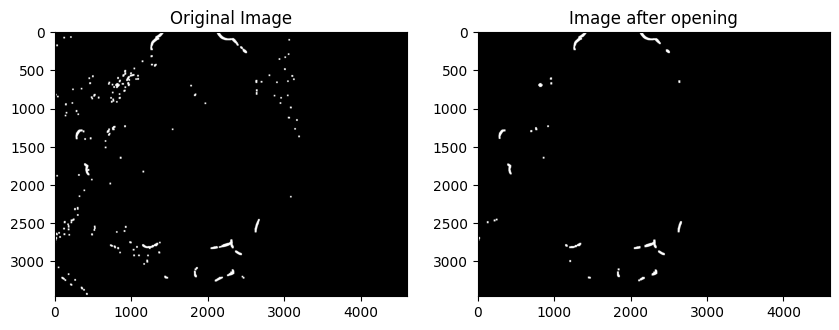

In [6]:
# read image
img = cv2.imread("../data/test2/Exp01_Block01_Image04_Pot001_mask.png")

# define the structure for morphological operations
kernel = np.ones((23, 23), np.uint8)

# perform morphological operations
# erosion followed by dilation (opening)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

# plot image original and after morphological operations
plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(img, cmap="gray")
plt.title("Original Image")
plt.subplot(122)
plt.imshow(opening, cmap="gray")
plt.title("Image after opening")
plt.show()

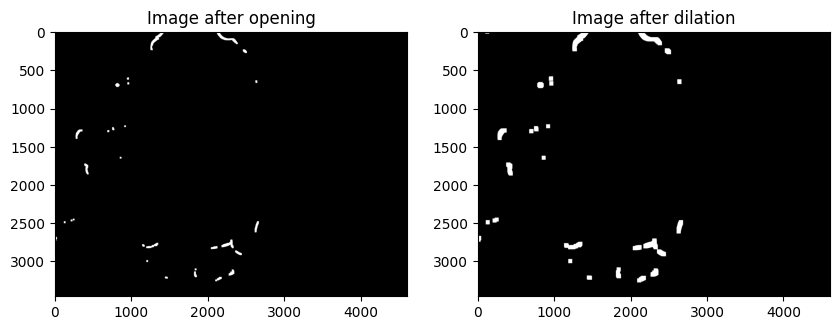

In [10]:
# Add padding to pixels to reconnect the broken parts
kernel = np.ones((30, 30), np.uint8)
dilation = cv2.dilate(opening, kernel, iterations=1)

# plot image original and after morphological operations
plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(opening, cmap="gray")
plt.title("Image after opening")
plt.subplot(122)
plt.imshow(dilation, cmap="gray")
plt.title("Image after dilation")
plt.show()

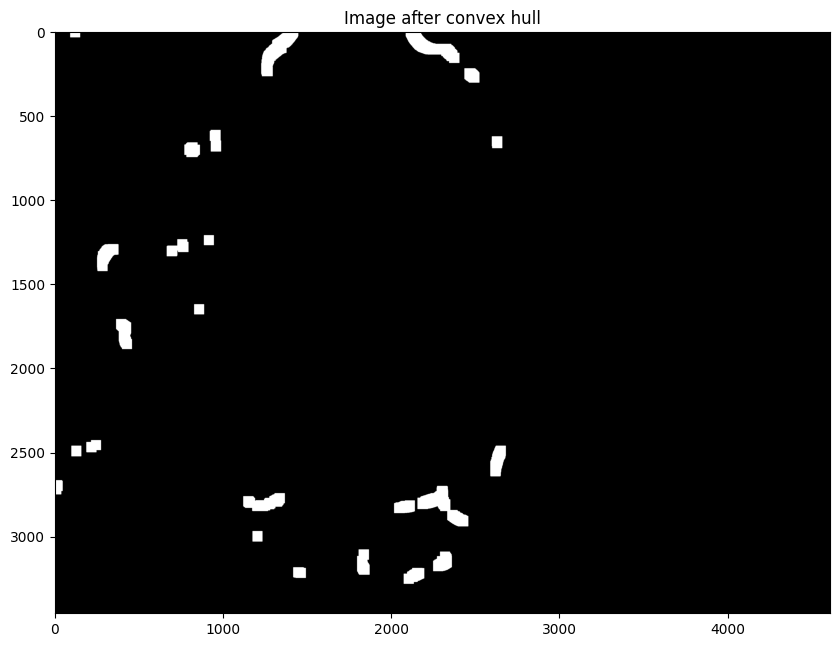

In [17]:
# Convert image to grayscale if it's not already
if len(dilation.shape) > 2:
    dilation = cv2.cvtColor(dilation, cv2.COLOR_BGR2GRAY)

# Convert image to 8-bit if it's not already
if dilation.dtype != np.uint8:
    dilation = cv2.convertScaleAbs(dilation)

# find contours in the binary image
contours, hierarchy = cv2.findContours(dilation, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

for cnt in contours:
    # get convex hull
    hull = cv2.convexHull(cnt)

    # draw the contour and hull
    cv2.drawContours(dilation, [cnt], 0, (255, 0, 0), 2)

# visualise the effect of the convex hull
plt.figure(figsize=(10, 10))
plt.imshow(dilation, cmap="gray")
plt.title("Image after convex hull")
plt.show()